# Proyecto 3
### Análisis de datos

In [37]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

Saving data_reducida_icfes.csv to data_reducida_icfes (1).csv


In [39]:
columnas = ["periodo", "cole_area_ubicacion", "cole_bilingue", "cole_calendario", "cole_caracter", "cole_genero", "cole_jornada", "cole_naturaleza", "cole_nombre_establecimiento", "cole_sede_principal", "estu_estudiante", "estu_genero", "fami_cuartoshogar", "fami_educacionmadre", "fami_educacionpadre", "fami_estratovivienda", "fami_personashogar", "fami_tieneautomovil", "fami_tienecomputador", "fami_tieneinternet", "fami_tienelavadora", "desemp_ingles", "punt_ingles", "punt_matematicas", "punt_sociales_ciudadanas", "punt_C_naturales", "punt_lectura_critica", "punt_global"]
datos = pd.read_csv('data_reducida_icfes.csv', sep=";", na_values="?")
print(datos.head())

   periodo cole_area_ubicacion cole_bilingue cole_calendario cole_caracter  \
0    20102              URBANO             N               A     ACADEMICO   
1    20194              URBANO             N               A     ACADEMICO   
2    20194              URBANO             N               A     ACADEMICO   
3    20194              URBANO             N               A     ACADEMICO   
4    20194              URBANO             N               A     ACADEMICO   

  cole_genero cole_jornada cole_naturaleza  \
0       MIXTO     COMPLETA         OFICIAL   
1       MIXTO       MANANA         OFICIAL   
2       MIXTO       MANANA         OFICIAL   
3       MIXTO        TARDE         OFICIAL   
4       MIXTO        TARDE         OFICIAL   

                        cole_nombre_establecimiento cole_sede_principal  ...  \
0                          COLEGIO BELLAVISTA (IED)                   S  ...   
1                        COLEGIO LAS AMERICAS (IED)                   S  ...   
2             

In [40]:
len(datos)

274786

In [41]:
datos['periodo'].unique()

array([20102, 20194, 20101, 20111, 20211, 20224, 20201])

In [42]:
# Hay duplicados?
datos.duplicated().value_counts()

False    274786
dtype: int64

In [43]:
# Quitamos las filas donde hayan valores vacíos en alguna de las variables
datos = datos.dropna().reset_index(drop=True) #elimina filas con valores faltantes
len(datos)

126830

In [44]:
datos.describe()

,periodo,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_C_naturales,punt_lectura_critica,punt_global
count,126830.000000,126830.000000,126830.000000,126830.000000,126830.000000,126830.000000,126830.000000
mean,20208.012781,56.541323,55.772026,52.044540,53.199606,56.844272,273.124537
std,14.694383,13.754996,11.509858,11.950128,10.264903,9.905253,50.107056
min,20194.000000,0.000000,0.000000,16.000000,20.000000,0.000000,75.000000
25%,20194.000000,47.000000,48.000000,43.000000,46.000000,50.000000,237.000000
50%,20194.000000,56.000000,56.000000,52.000000,53.000000,57.000000,273.000000
75%,20224.000000,65.000000,64.000000,61.000000,61.000000,64.000000,309.000000
max,20224.000000,100.000000,100.000000,100.000000,100.000000,100.000000,479.000000


In [45]:
datos.nunique()

periodo                           4
cole_area_ubicacion               2
cole_bilingue                     2
cole_calendario                   3
cole_caracter                     4
cole_genero                       3
cole_jornada                      6
cole_naturaleza                   2
cole_nombre_establecimiento    1125
cole_sede_principal               2
estu_estudiante                   1
estu_genero                       2
fami_cuartoshogar                 6
fami_educacionmadre              12
fami_educacionpadre              12
fami_estratovivienda              7
fami_personashogar                5
fami_tieneautomovil               2
fami_tienecomputador              2
fami_tieneinternet                2
fami_tienelavadora                2
desemp_ingles                     5
punt_ingles                      71
punt_matematicas                 73
punt_sociales_ciudadanas         71
punt_C_naturales                 64
punt_lectura_critica             65
punt_global                 

In [46]:
datos['periodo'].unique()

array([20194, 20211, 20224, 20201])

Descargar base de datos sin duplicados:

In [47]:
#datos.to_csv('datos_sin_duplic.csv', index=False)
#files.download('datos_sin_duplic.csv')


### Conversión de variables de texto a variable numéricas categóricas:

In [48]:
datos_disc = datos.copy()

#### Área de ubicación Colegio 

In [49]:
datos['cole_area_ubicacion'].unique()

array(['URBANO', 'RURAL'], dtype=object)

In [50]:
for i in datos.index:
  if datos.loc[i, 'cole_area_ubicacion'] == "URBANO":
    datos_disc.loc[i, 'cole_area_ubicacion'] = 1
  else:
    datos_disc.loc[i, 'cole_area_ubicacion'] = 0

<ipython-input-51-b4731efa78bb>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


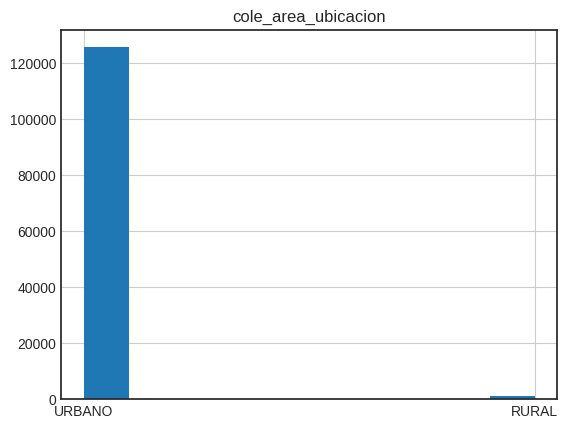

In [51]:
# Histograma
plt.style.use('seaborn-white')
plt.hist(datos['cole_area_ubicacion'], color='blue')
datos['cole_area_ubicacion'].hist().set_title('cole_area_ubicacion')
plt.show()

In [52]:
sum(datos_disc['cole_area_ubicacion'])/len(datos_disc['cole_area_ubicacion'])

0.9902940944571473

#### Colegio Bilingue

In [53]:
datos['cole_bilingue'].unique()

array(['N', 'S'], dtype=object)

In [54]:
for i in datos.index:
  if datos.loc[i, 'cole_bilingue'] == "S":
    datos_disc.loc[i, 'cole_bilingue'] = 1
  else:
    datos_disc.loc[i, 'cole_bilingue'] = 0

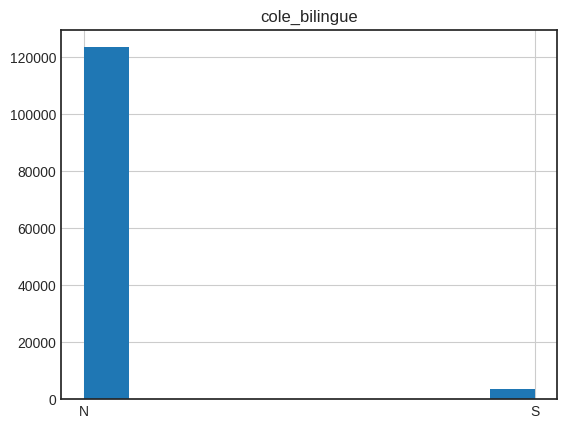

In [55]:
# Histograma
plt.hist(datos['cole_bilingue'], color='blue')
datos_disc[ 'cole_bilingue'].hist().set_title( 'cole_bilingue')
plt.show()

#### Calendario del Colegio 

In [56]:
datos['cole_calendario'].unique()

array(['A', 'B', 'OTRO'], dtype=object)

In [57]:
for i in datos.index:
  if datos.loc[i, 'cole_calendario'] == "A":
    datos_disc.loc[i, 'cole_calendario'] = 1
  elif datos.loc[i, 'cole_calendario'] == "B":
    datos_disc.loc[i, 'cole_calendario'] = 2
  else:
    datos_disc.loc[i, 'cole_calendario'] = 0

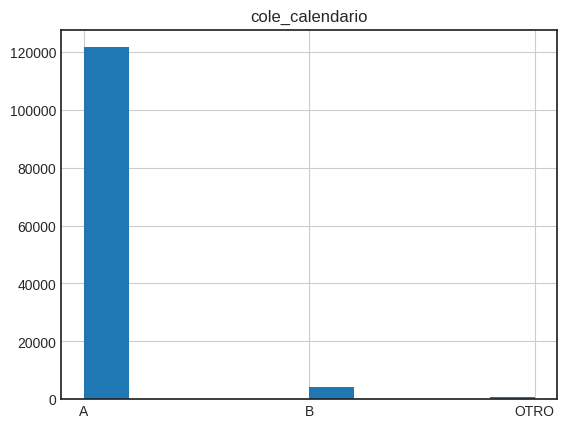

In [58]:
# Histograma
plt.hist(datos['cole_calendario'], color='blue')
datos['cole_calendario'].hist().set_title('cole_calendario')
plt.show()

#### Caracter del Colegio

In [59]:
datos['cole_caracter'].unique()

array(['ACADEMICO', 'TECNICO/ACADEMICO', 'TECNICO', 'NO APLICA'],
      dtype=object)

In [60]:
for i in datos.index:
  if datos.loc[i, 'cole_caracter'] == "ACADEMICO":
    datos_disc.loc[i, 'cole_caracter'] = 1
  elif datos.loc[i, 'cole_caracter'] == "TECNICO/ACADEMICO":
    datos_disc.loc[i, 'cole_caracter'] = 2
  elif datos.loc[i, 'cole_caracter'] == "TECNICO":
    datos_disc.loc[i, 'cole_caracter'] = 3
  else:
    datos_disc.loc[i, 'cole_caracter'] = 0

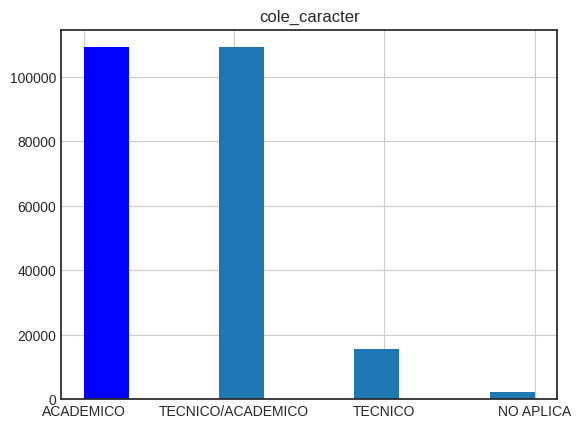

In [61]:
# Histograma
plt.hist(datos['cole_caracter'], color='blue')
datos_disc['cole_caracter'].hist().set_title('cole_caracter')
plt.show()

#### Género Colegio

In [62]:
datos['cole_genero'].unique()

array(['MIXTO', 'FEMENINO', 'MASCULINO'], dtype=object)

In [63]:
for i in datos.index:
  if datos.loc[i, 'cole_genero'] == 'FEMENINO':
    datos_disc.loc[i, 'cole_genero'] = 1
  elif datos.loc[i, 'cole_genero'] == 'MASCULINO':
    datos_disc.loc[i, 'cole_genero'] = 2
  else:
    datos_disc.loc[i, 'cole_genero'] = 0

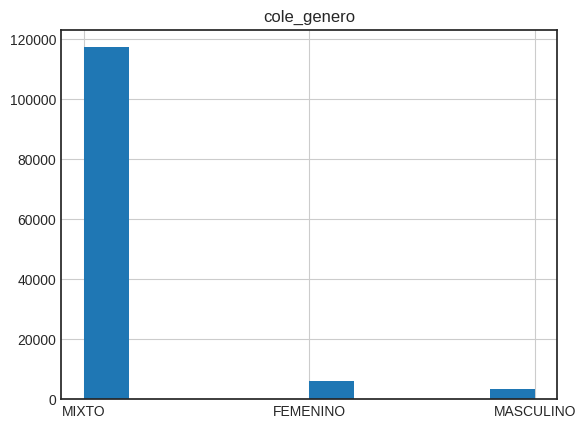

In [64]:
# Histograma
plt.hist(datos['cole_genero'], color='blue')
datos_disc['cole_genero'].hist().set_title('cole_genero')
plt.show()

#### Jornada Colegio

In [65]:
datos['cole_jornada'].unique()

array(['MANANA', 'TARDE', 'COMPLETA', 'NOCHE', 'UNICA', 'SABATINA'],
      dtype=object)

In [66]:
for i in datos.index:
  if datos.loc[i, 'cole_jornada'] == "MAÑANA":
    datos_disc.loc[i, 'cole_jornada'] = 1
  elif datos.loc[i, 'cole_jornada'] == "TARDE":
    datos_disc.loc[i, 'cole_jornada'] = 2
  elif datos.loc[i, 'cole_jornada'] == "COMPLETA":
    datos_disc.loc[i, 'cole_jornada'] = 3
  elif datos.loc[i, 'cole_jornada'] == "NOCHE":
    datos_disc.loc[i, 'cole_jornada'] = 4
  elif datos.loc[i, 'cole_jornada'] == "UNICA":
    datos_disc.loc[i, 'cole_jornada'] = 5
  else:
    datos_disc.loc[i, 'cole_jornada'] = 0

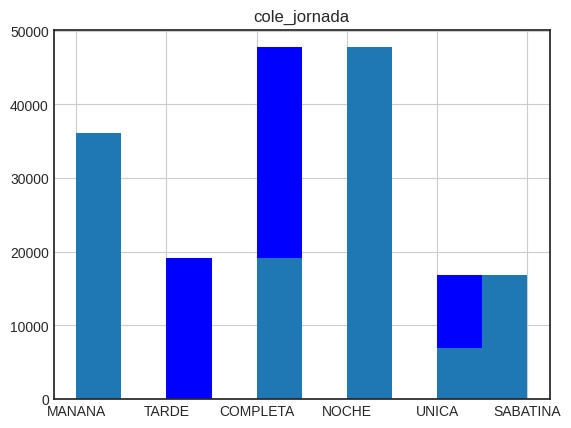

In [67]:
# Histograma
plt.hist(datos['cole_jornada'], color='blue')
datos_disc['cole_jornada'].hist().set_title('cole_jornada')
plt.show()

#### Colegio Naturaleza

In [68]:
datos['cole_naturaleza'].unique()

array(['OFICIAL', 'NO OFICIAL'], dtype=object)

In [69]:
for i in datos.index:
  if datos.loc[i, 'cole_naturaleza'] == "OFICIAL":
    datos_disc.loc[i, 'cole_naturaleza'] = 1
  else:
    datos_disc.loc[i, 'cole_naturaleza'] = 0

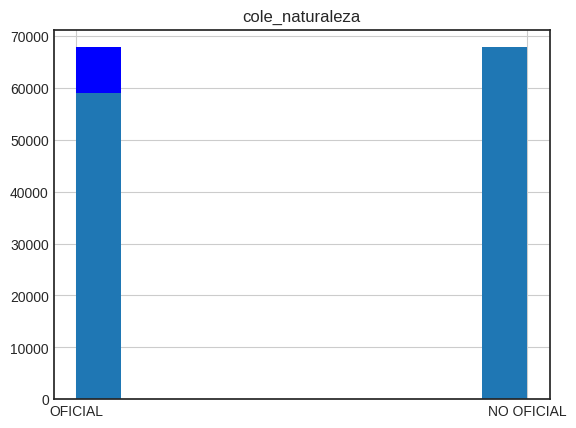

In [70]:
# Histograma
plt.hist(datos['cole_naturaleza'], color='blue')
datos_disc['cole_naturaleza'].hist().set_title('cole_naturaleza')
plt.show()

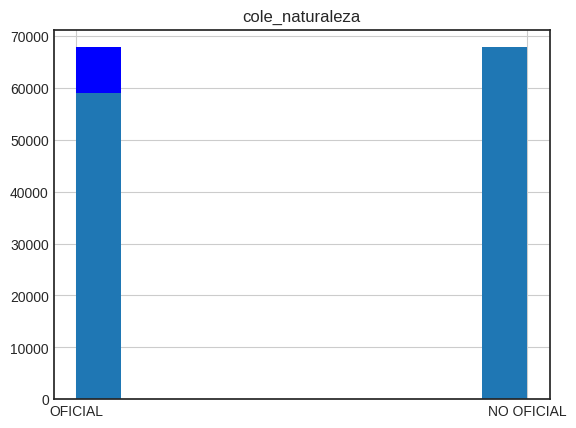

In [71]:
# Histograma
plt.hist(datos['cole_naturaleza'], color='blue')
datos_disc['cole_naturaleza'].hist().set_title('cole_naturaleza')
plt.show()

#### Género del estudiante

In [72]:
datos['estu_genero'].unique()

array(['M', 'F'], dtype=object)

In [73]:
for i in datos.index:
  if datos.loc[i, 'estu_genero'] == "F":
    datos_disc.loc[i, 'estu_genero'] = 1
  else:
    datos_disc.loc[i, 'estu_genero'] = 0

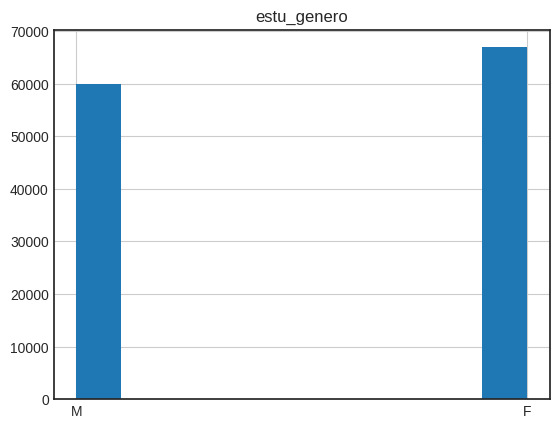

In [74]:
# Histograma
plt.hist(datos['estu_genero'], color='blue')
datos['estu_genero'].hist().set_title('estu_genero')
plt.show()

#### Sede Principal Colegio

In [75]:
datos['cole_sede_principal'].unique()

array(['S', 'N'], dtype=object)

In [76]:
for i in datos.index:
  if datos.loc[i, 'cole_sede_principal'] == "S":
    datos_disc.loc[i, 'cole_sede_principal'] = 1
  else:
    datos_disc.loc[i, 'cole_sede_principal'] = 0

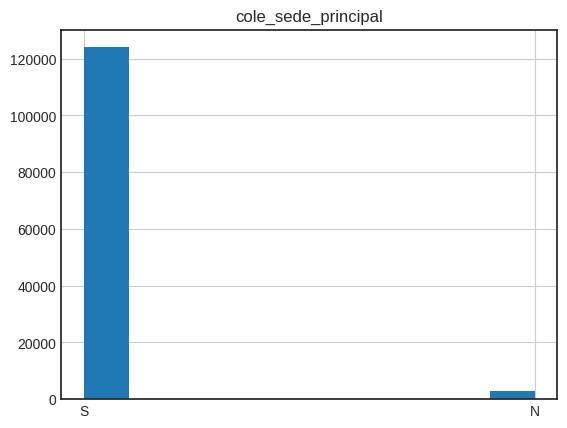

In [77]:
# Histograma
plt.hist(datos['cole_sede_principal'], color='blue')
datos['cole_sede_principal'].hist().set_title('cole_sede_principal')
plt.show()

#### Número de cuartos en el hogar




In [78]:
datos['fami_cuartoshogar'].unique()

array(['Dos', 'Cuatro', 'Tres', 'Cinco', 'Seis o mas', 'Uno'],
      dtype=object)

In [79]:
for i in range(0, 126830):
  if datos.loc[i, 'fami_cuartoshogar'] == "Uno":
    datos_disc.loc[i, 'fami_cuartoshogar'] = 1
  elif datos.loc[i, 'fami_cuartoshogar'] == "Dos":
    datos_disc.loc[i, 'fami_cuartoshogar'] = 2
  elif datos.loc[i, 'fami_cuartoshogar'] == "Tres":
    datos_disc.loc[i, 'fami_cuartoshogar'] = 3
  elif datos.loc[i, 'fami_cuartoshogar'] == "Cuatro":
    datos_disc.loc[i, 'fami_cuartoshogar'] = 4
  elif datos.loc[i, 'fami_cuartoshogar'] == "Cinco":
    datos_disc.loc[i, 'fami_cuartoshogar'] = 5
  else:
    datos_disc.loc[i, 'fami_cuartoshogar'] = 6

<Axes: >

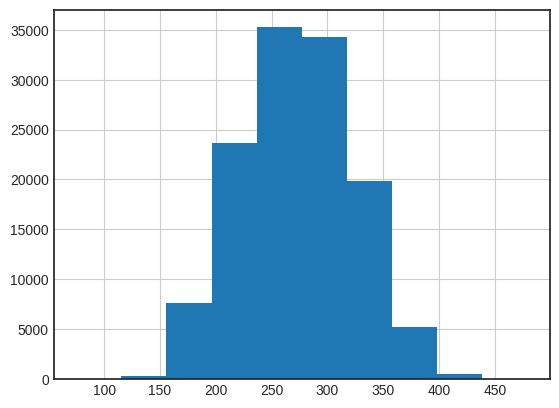

In [80]:
# Histograma
datos['punt_global'].hist()

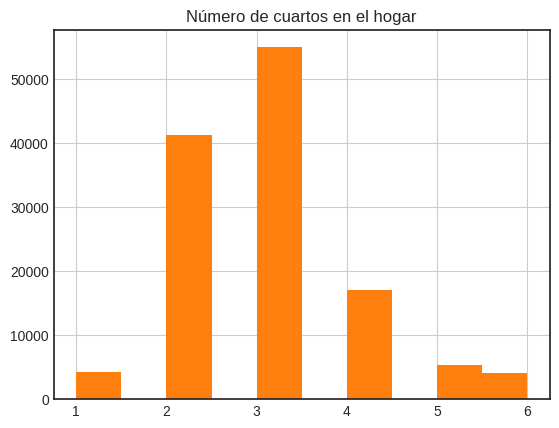

In [81]:
# Histograma
datos_disc['fami_cuartoshogar'].hist()
datos_disc['fami_cuartoshogar'].hist().set_title('Número de cuartos en el hogar')
plt.show()

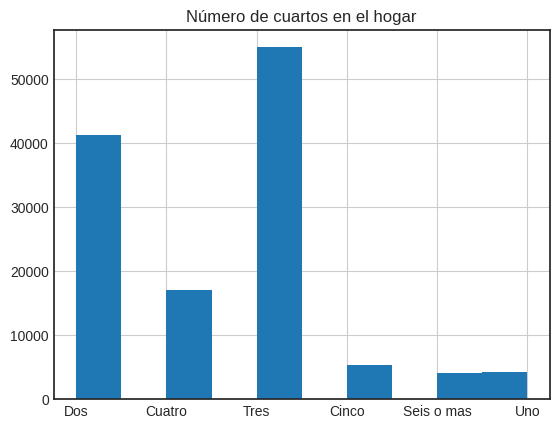

In [82]:
# Histograma
plt.hist(datos['fami_cuartoshogar'], color='blue')
datos['fami_cuartoshogar'].hist().set_title('Número de cuartos en el hogar')
plt.show()

#### Educación de madre

In [83]:
datos['fami_educacionmadre'].unique()

array(['Secundaria (Bachillerato) incompleta', 'No sabe',
       'Tecnica o tecnologica completa', 'Primaria completa',
       'Educacion profesional completa',
       'Secundaria (Bachillerato) completa', 'Primaria incompleta',
       'Postgrado', 'Educacion profesional incompleta', 'Ninguno',
       'Tecnica o tecnologica incompleta', 'No Aplica'], dtype=object)

In [84]:
for i in range(0, 126830):
  if (datos.loc[i, 'fami_educacionmadre'] == 'Primaria incompleta') or (datos.loc[i, 'fami_educacionmadre'] == 'Primaria completa'):
    datos_disc.loc[i, 'fami_educacionmadre'] = 1
  elif (datos.loc[i, 'fami_educacionmadre'] == 'Secundaria (Bachillerato) incompleta') or (datos.loc[i, 'fami_educacionmadre'] == 'Secundaria (Bachillerato) completa'):
    datos_disc.loc[i, 'fami_educacionmadre'] = 2
  elif (datos.loc[i, 'fami_educacionmadre'] == 'Tecnica o tecnologica incompleta') or (datos.loc[i, 'fami_educacionmadre'] == 'Tecnica o tecnologica completa'):
    datos_disc.loc[i, 'fami_educacionmadre'] = 3
  elif (datos.loc[i, 'fami_educacionmadre'] == 'Educacion profesional incompleta') or (datos.loc[i, 'fami_educacionmadre'] == 'Educacion profesional completa'):
    datos_disc.loc[i, 'fami_educacionmadre'] = 4
  elif datos.loc[i, 'fami_educacionmadre'] == 'Postgrado':
    datos_disc.loc[i, 'fami_educacionmadre'] = 5
  else:
    datos_disc.loc[i, 'fami_educacionmadre'] = 0

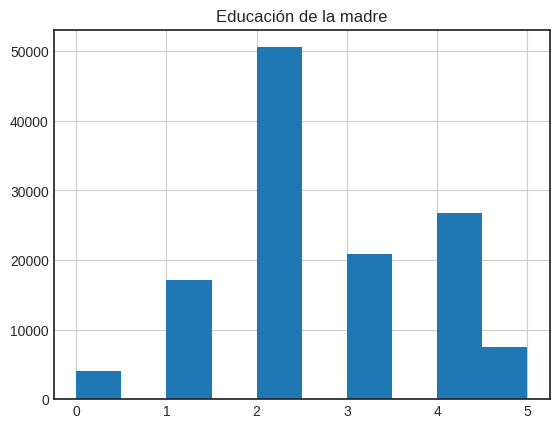

In [85]:
# Histograma
plt.hist(datos_disc['fami_educacionmadre'], color='blue')
datos_disc['fami_educacionmadre'].hist().set_title('Educación de la madre')
plt.show()

#### Educación de padre

In [86]:
datos['fami_educacionpadre'].unique()

array(['Secundaria (Bachillerato) completa', 'No sabe',
       'Primaria incompleta', 'Educacion profesional incompleta',
       'Primaria completa', 'Educacion profesional completa',
       'Secundaria (Bachillerato) incompleta',
       'Tecnica o tecnologica incompleta', 'Postgrado',
       'Tecnica o tecnologica completa', 'Ninguno', 'No Aplica'],
      dtype=object)

In [87]:
for i in range(0, 126830):
  if (datos.loc[i, 'fami_educacionpadre'] == 'Primaria incompleta') or (datos.loc[i, 'fami_educacionpadre'] == 'Primaria completa'):
    datos_disc.loc[i, 'fami_educacionpadre'] = 1
  elif (datos.loc[i, 'fami_educacionpadre'] == 'Secundaria (Bachillerato) incompleta') or (datos.loc[i, 'fami_educacionpadre'] == 'Secundaria (Bachillerato) completa'):
    datos_disc.loc[i, 'fami_educacionpadre'] = 2
  elif (datos.loc[i, 'fami_educacionpadre'] == 'Tecnica o tecnologica incompleta') or (datos.loc[i, 'fami_educacionpadre'] == 'Tecnica o tecnologica completa'):
    datos_disc.loc[i, 'fami_educacionpadre'] = 3
  elif (datos.loc[i, 'fami_educacionpadre'] == 'Educacion profesional incompleta') or (datos.loc[i, 'fami_educacionpadre'] == 'Educacion profesional completa'):
    datos_disc.loc[i, 'fami_educacionpadre'] = 4
  elif datos.loc[i, 'fami_educacionpadre'] == 'Postgrado':
    datos_disc.loc[i, 'fami_educacionpadre'] = 5
  else:
    datos_disc.loc[i, 'fami_educacionpadre'] = 0

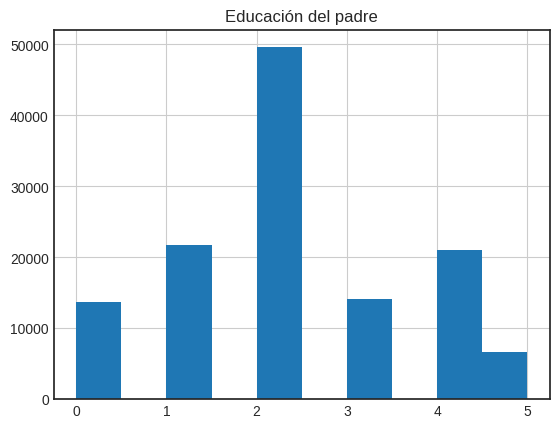

In [88]:
# Histograma
plt.hist(datos_disc['fami_educacionpadre'], color='blue')
datos_disc['fami_educacionpadre'].hist().set_title('Educación del padre')
plt.show()

#### Estrato de la vivienda

In [89]:
datos['fami_estratovivienda'].unique()

array(['Estrato 3', 'Estrato 2', 'Estrato 4', 'Estrato 1', 'Estrato 6',
       'Sin Estrato', 'Estrato 5'], dtype=object)

In [90]:
for i in range(0, 126830):
  if datos.loc[i, 'fami_estratovivienda'] == "Sin estrato":
    datos_disc.loc[i, 'fami_estratovivienda'] = 0
  elif datos.loc[i, 'fami_estratovivienda'] == "Estrato 1":
    datos_disc.loc[i, 'fami_estratovivienda'] = 1
  elif datos.loc[i, 'fami_estratovivienda'] == "Estrato 2":
    datos_disc.loc[i, 'fami_estratovivienda'] = 2
  elif datos.loc[i, 'fami_estratovivienda'] == "Estrato 3":
    datos_disc.loc[i, 'fami_estratovivienda'] = 3
  elif datos.loc[i, 'fami_estratovivienda'] == "Estrato 4":
    datos_disc.loc[i, 'fami_estratovivienda'] = 4
  elif datos.loc[i, 'fami_estratovivienda'] == "Estrato 5":
    datos_disc.loc[i, 'fami_estratovivienda'] = 5
  else:
    datos_disc.loc[i, 'fami_estratovivienda'] = 6

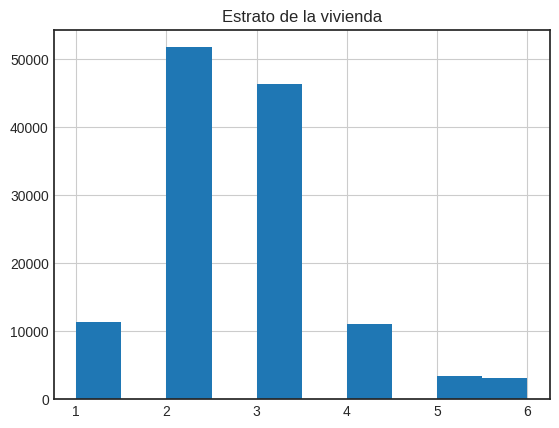

In [91]:
# Histograma
plt.hist(datos_disc['fami_estratovivienda'], color='blue')
datos_disc['fami_estratovivienda'].hist().set_title('Estrato de la vivienda')
plt.show()

#### Número de personas en el hogar

In [92]:
datos['fami_personashogar'].unique()

array(['5 a 6', '3 a 4', '1 a 2', '7 a 8', '9 o más'], dtype=object)

In [93]:
for i in range(0, 126830):
  if datos.loc[i, 'fami_personashogar'] == "1 a 2":
    datos_disc.loc[i, 'fami_personashogar'] = 1
  elif datos.loc[i, 'fami_personashogar'] == "3 a 4":
    datos_disc.loc[i, 'fami_personashogar'] = 2
  elif datos.loc[i, 'fami_personashogar'] == "5 a 6":
    datos_disc.loc[i, 'fami_personashogar'] = 3
  elif datos.loc[i, 'fami_personashogar'] == "7 a 8":
    datos_disc.loc[i, 'fami_personashogar'] = 4
  else:
    datos_disc.loc[i, 'fami_personashogar'] = 5

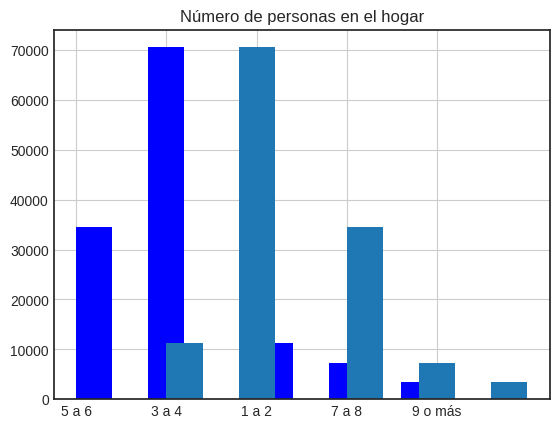

In [94]:
# Histograma
plt.hist(datos['fami_personashogar'], color='blue')
datos_disc['fami_personashogar'].hist().set_title('Número de personas en el hogar')
plt.show()

#### ¿Tiene automovil?

In [95]:
datos['fami_tieneautomovil'].unique()

array(['No', 'Si'], dtype=object)

In [96]:
for i in range(0, 126830):
  if datos.loc[i, 'fami_tieneautomovil'] == "Si":
    datos_disc.loc[i, 'fami_tieneautomovil'] = 1
  else:
    datos_disc.loc[i, 'fami_tieneautomovil'] = 0

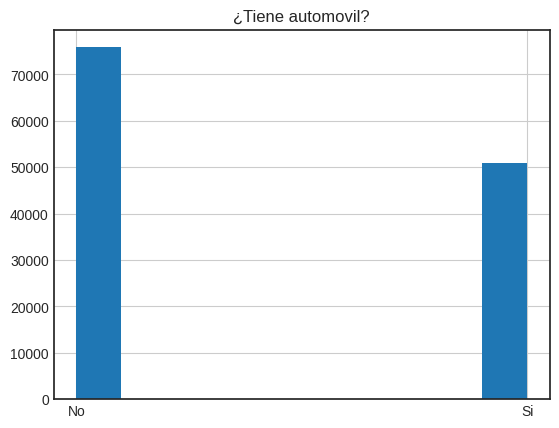

In [97]:
# Histograma
plt.hist(datos['fami_tieneautomovil'], color='blue')
datos['fami_tieneautomovil'].hist().set_title('¿Tiene automovil?')
plt.show()

#### ¿Tiene computador?

In [98]:
for i in range(0, 126830):
  if datos.loc[i, 'fami_tienecomputador'] == "Si":
    datos_disc.loc[i, 'fami_tienecomputador'] = 1
  else:
    datos_disc.loc[i, 'fami_tienecomputador'] = 0

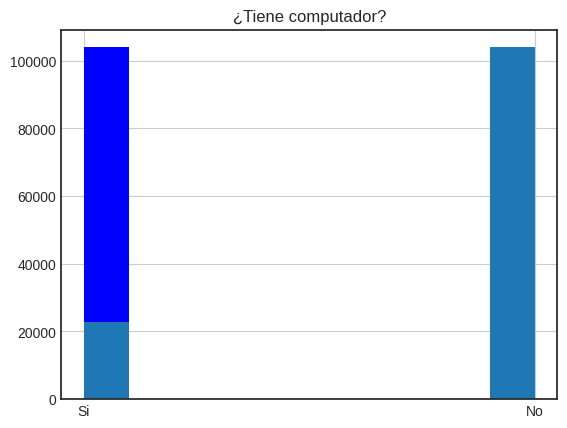

In [99]:
# Histograma
plt.hist(datos['fami_tienecomputador'], color='blue')
datos_disc['fami_tienecomputador'].hist().set_title('¿Tiene computador?')
plt.show()

#### ¿Tiene internet?

In [100]:
for i in range(0, 126830):
  if datos.loc[i, 'fami_tieneinternet'] == "Si":
    datos_disc.loc[i, 'fami_tieneinternet'] = 1
  else:
    datos_disc.loc[i, 'fami_tieneinternet'] = 0

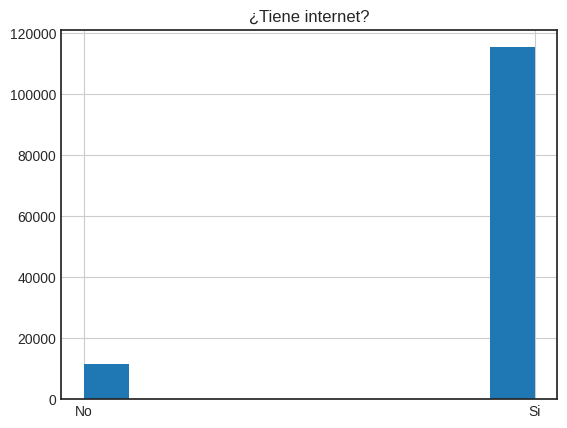

In [101]:
# Histograma
plt.hist(datos['fami_tieneinternet'], color='blue')
datos_disc['fami_tieneinternet'].hist().set_title('¿Tiene internet?')
plt.show()

#### ¿Tiene lavadora?

In [102]:
for i in range(0, 126830):
  if datos.loc[i, 'fami_tienelavadora'] == "Si":
    datos_disc.loc[i, 'fami_tienelavadora'] = 1
  else:
    datos_disc.loc[i, 'fami_tienelavadora'] = 0

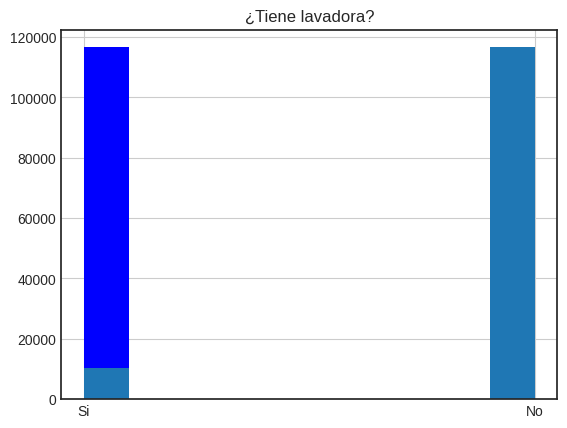

In [103]:
# Histograma
plt.hist(datos['fami_tienelavadora'], color='blue')
datos_disc['fami_tienelavadora'].hist().set_title('¿Tiene lavadora?')
plt.show()

#### Desempeño de inglés

In [104]:
datos['desemp_ingles'].unique()

array(['A1', 'A-', 'A2', 'B1', 'B+'], dtype=object)

In [105]:
for i in range(0, 126830):
  if datos.loc[i, 'desemp_ingles'] == 'A-':
    datos_disc.loc[i, 'desemp_ingles'] = 1
  elif datos.loc[i, 'desemp_ingles'] == 'A1':
    datos_disc.loc[i, 'desemp_ingles'] = 2
  elif datos.loc[i, 'desemp_ingles'] == 'A2':
    datos_disc.loc[i, 'desemp_ingles'] = 3
  elif datos.loc[i, 'desemp_ingles'] == 'B1':
    datos_disc.loc[i, 'desemp_ingles'] = 4
  else:
    datos_disc.loc[i, 'desemp_ingles'] = 5

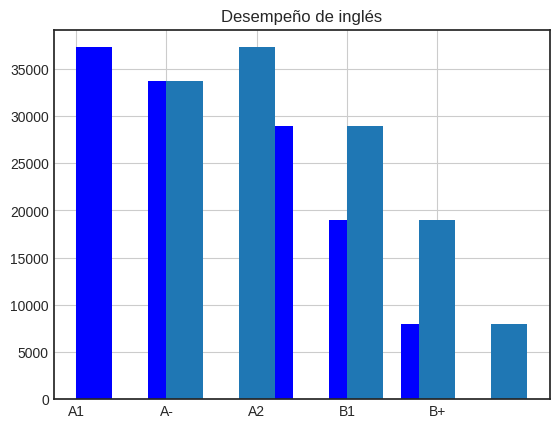

In [106]:
# Histograma
plt.hist(datos['desemp_ingles'], color='blue')
datos_disc['desemp_ingles'].hist().set_title('Desempeño de inglés')
plt.show()

In [107]:
sns.violinplot(x='fami_estratovivienda', y='desemp_ingles', data=datos_disc)
plt.show()

TypeError: ignored

### Puntaje global

In [ ]:
datos['punt_global'].unique()

In [120]:
for i in datos.index:
  if datos.loc[i, 'punt_global'] <= 200:
    datos_disc.loc[i, 'punt_global'] = 1
  elif datos.loc[i, 'punt_global'] <= 250:
    datos_disc.loc[i, 'punt_global'] = 2
  elif datos.loc[i, 'punt_global'] <= 300:
    datos_disc.loc[i, 'punt_global'] = 3
  elif datos.loc[i, 'punt_global'] <= 350:
    datos_disc.loc[i, 'punt_global'] = 4
  else:
    datos_disc.loc[i, 'punt_global'] = 5

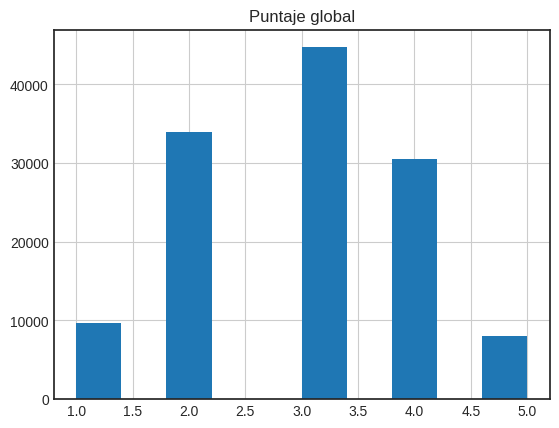

In [122]:
# Histograma
plt.hist(datos_disc['punt_global'], color='blue')
datos_disc['punt_global'].hist().set_title('Puntaje global')
plt.show()

#### Descargar datos discretizados

In [ ]:
simplif = datos_disc.loc[:, ["cole_jornada", "cole_naturaleza", "estu_genero", "fami_cuartoshogar", "fami_educacionmadre", "fami_educacionpadre", "fami_estratovivienda", "fami_personashogar", "fami_tieneautomovil", "fami_tienecomputador", "fami_tieneinternet", "fami_tienelavadora", "desemp_ingles", "punt_global"]]
simplif.head()

In [ ]:
#simplif.to_csv('datos_discretizados.csv', index=False)
#files.download('datos_discretizados.csv')

### Análisis de datos

In [ ]:
corr_matrix = datos_disc.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

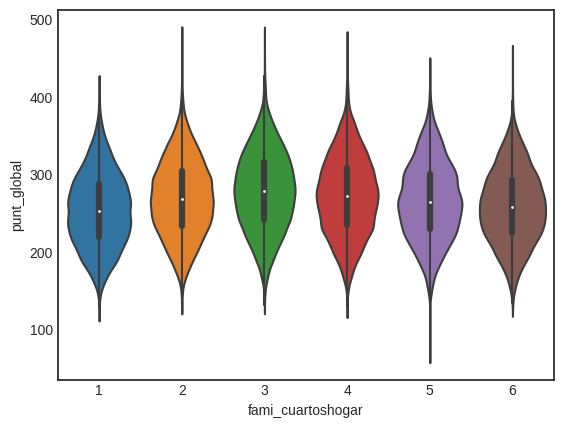

In [108]:
sns.violinplot(x='fami_cuartoshogar', y='punt_global', data=datos_disc)
plt.show()

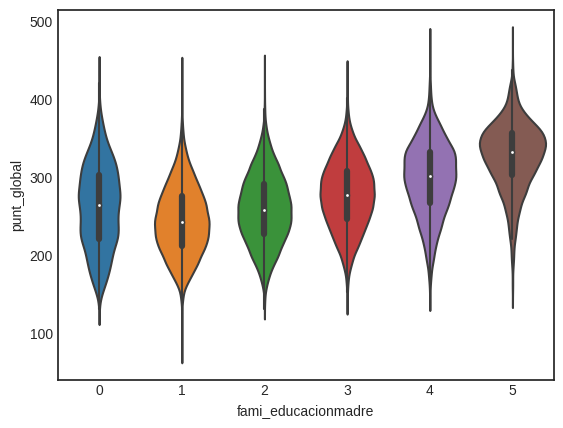

In [109]:
sns.violinplot(x='fami_educacionmadre', y='punt_global', data=datos_disc)
plt.show()

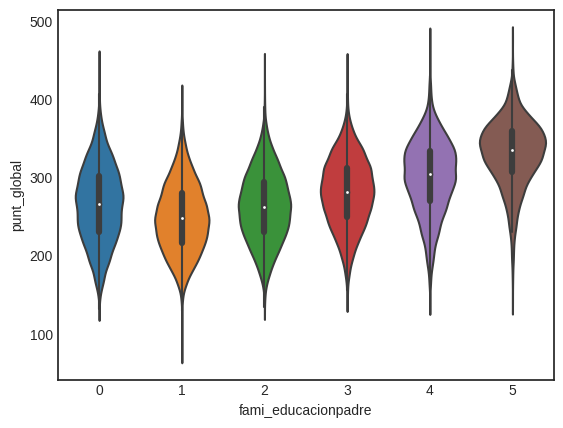

In [110]:
sns.violinplot(x='fami_educacionpadre', y='punt_global', data=datos_disc)
plt.show()

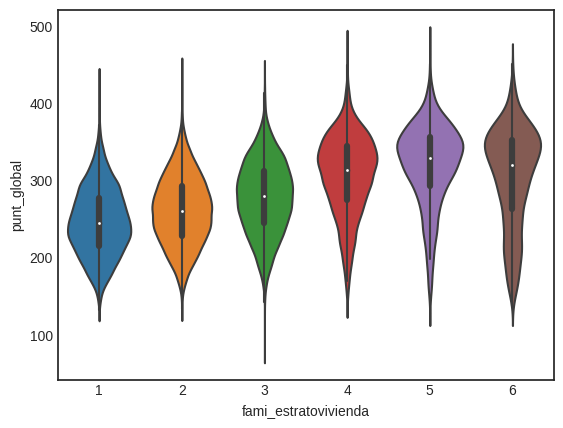

In [112]:
sns.violinplot(x='fami_estratovivienda', y='punt_global', data=datos_disc)
plt.show()

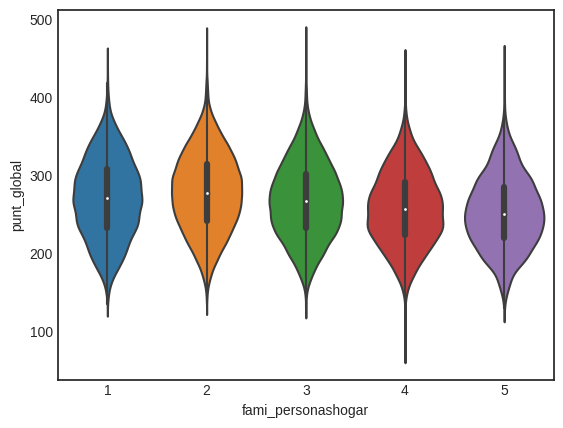

In [113]:
sns.violinplot(x='fami_personashogar', y='punt_global', data=datos_disc)
plt.show()

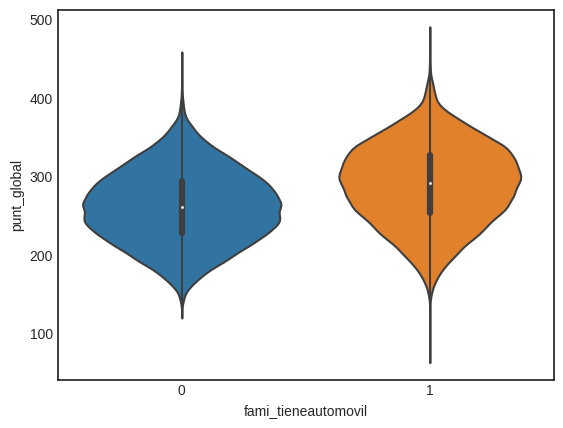

In [114]:
sns.violinplot(x='fami_tieneautomovil', y='punt_global', data=datos_disc)
plt.show()

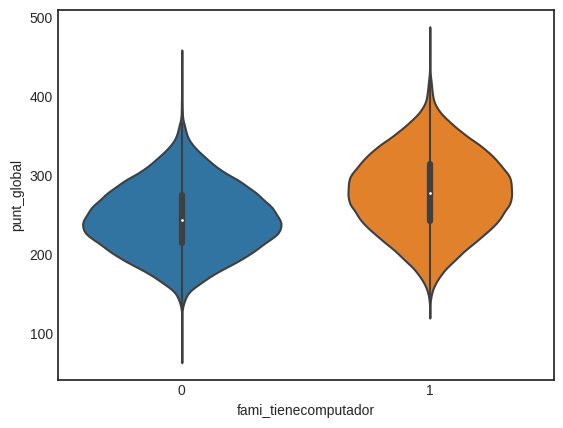

In [115]:
sns.violinplot(x='fami_tienecomputador', y='punt_global', data=datos_disc)
plt.show()

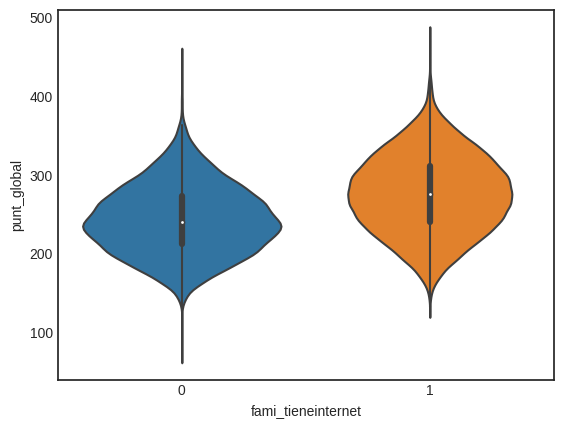

In [116]:
sns.violinplot(x='fami_tieneinternet', y='punt_global', data=datos_disc)
plt.show()

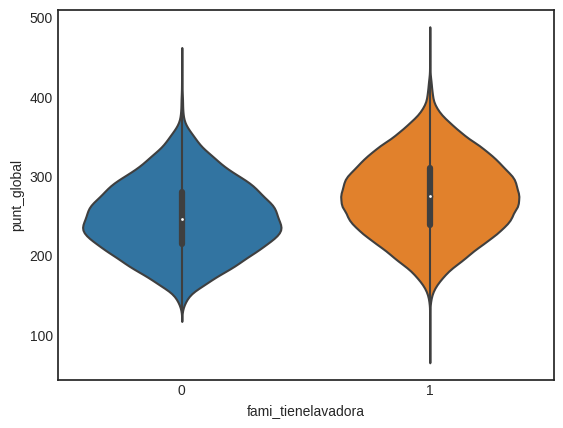

In [117]:
sns.violinplot(x='fami_tienelavadora', y='punt_global', data=datos_disc)
plt.show()

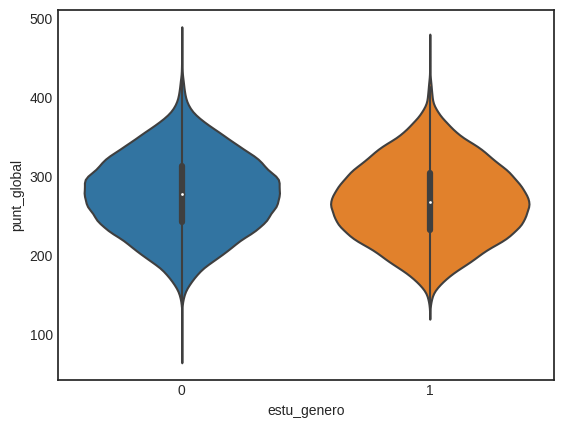

In [119]:
sns.violinplot(x='estu_genero', y='punt_global', data=datos_disc)
plt.show()

#### CORRELACIÓN VARIABLES FAMILIA

In [ ]:
# Seleccionar las variables específicas para la matriz de correlación
variables_familia = ['fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre', 'fami_estratovivienda','fami_personashogar', 'fami_tieneautomovil', 'fami_tienecomputador','fami_tieneinternet', 'fami_tienelavadora', 'punt_global']
  
# Obtener una subtabla con las variables seleccionadas
subtabla = datos_disc[variables_familia].apply(pd.to_numeric, errors='coerce')


In [ ]:
subtabla.head

In [ ]:
corr_familia = subtabla.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr_familia, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Variables Familia')
plt.show()

In [ ]:
corr_familia

#### CORRELACIÓN VARIABLES COLEGIO

In [ ]:
# Seleccionar las variables específicas para la matriz de correlación
variables_colegio = ['cole_area_ubicacion', "cole_bilingue", "cole_calendario", "cole_caracter", "cole_genero", "cole_jornada", "cole_naturaleza", "cole_sede_principal", 'punt_global']

# Obtener una subtabla con las variables seleccionadas
subtabla_colegio = datos_disc[variables_colegio].apply(pd.to_numeric, errors='coerce')

In [ ]:
corr_colegio = subtabla_colegio.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr_colegio, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Variables Colegio')
plt.show()